In [ ]:
Challenge 1
Francesco wonders: what makes a diamond valuable? You should provide him with an answer.

Don Francesco has been very clear with you: he is not a fan of tech jargon, 
so keep your message plain and simple. However, he trusts no one - certainly not you.
He's hired Luca, another data scientist, to double-check your findings (no pressure!). Your mission is simple.

Create a Jupyter notebook to explain what Francesco should look at and why.
Your code should be understandable by a data scientist like Luca, 
but your text and visualizations should be clear for a layman like Francesco.

In [ ]:
### PLAN:
    1) Understand how the data looks like with local tests
    2) Cleaning the dataset and preparing data
    3) Produce the data that is not provided
    4) Learn the variable inter-dependencies
    5) Conclusions

In [ ]:
# XSTREAM 

import numpy as np
import pandas as pd

path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\"
file = "diamonds.csv"

df = pd.read_csv(path + file)
df.info()
print(df.head())

In [18]:
#CONVERTING TSV
import pandas as pd

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Specify the path for the TSV file
tsv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.tsv"

# Save the DataFrame to a TSV file
df.to_csv(tsv_path, sep='\t', index=False)

print(f"File converted and saved to {tsv_path}")

File converted and saved to C:\Users\cassiorodrigo.crisfa\Documents\GitHub\xtream-ai-assignment\Cristani\diamonds.tsv


In [19]:
import pandas as pd

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Mapping dictionaries for 'cut', 'clarity', and 'color'
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

# Explicit mapping for 'color', excluding "A", "B", and "C"
color_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7, 'K': 8, 'L': 9, 'M': 10,
                 'N': 11, 'O': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'U': 18, 'V': 19, 'W': 20,
                 'X': 21, 'Y': 22, 'Z': 23}

# Convert 'cut', 'clarity', and 'color' columns to integers using mappings
df['cut'] = df['cut'].map(cut_mapping)
df['clarity'] = df['clarity'].map(clarity_mapping)
df['color'] = df['color'].map(color_mapping)

# Create 'color_classification' column based on specified conditions
df['color_classification'] = pd.Series(dtype='str')  # Create an empty string column

# Explicitly set 'color_classification'
df.loc[(df['color'] >= 1) & (df['color'] <= 3), 'color_classification'] = 'Colorless'
df.loc[(df['color'] >= 4) & (df['color'] <= 7), 'color_classification'] = 'Near Colorless'
df.loc[(df['color'] >= 8) & (df['color'] <= 10), 'color_classification'] = 'Faint Yellow'
df.loc[(df['color'] >= 11) & (df['color'] <= 15), 'color_classification'] = 'Very Light Yellow'
df.loc[(df['color'] >= 16) & (df['color'] <= 23), 'color_classification'] = 'Light Yellow'

# Calculate 'z_depth' and 'table_width' columns
df['z_depth'] = df['depth'] * df['z'] * 100
df['table_width'] = df['table'] * df['x'] * 100

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Save the updated DataFrame to a new CSV file
df.to_csv(csv_path, index=False)

# Save 'color_classification' column to a new TSV file without header
color_class_tsv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\color_class.tsv"
df['color_classification'].to_csv(color_class_tsv_path, sep='\t', header=False, index=False)

print(f"Updated DataFrame saved to {csv_path}")
print(f"Color Classification saved to {color_class_tsv_path}")


Updated DataFrame saved to C:\Users\cassiorodrigo.crisfa\Documents\GitHub\xtream-ai-assignment\Cristani\diamonds.csv
Color Classification saved to C:\Users\cassiorodrigo.crisfa\Documents\GitHub\xtream-ai-assignment\Cristani\color_class.tsv


In [20]:
print(df)


      carat  cut  color  clarity  depth  table  price     x     y     z  \
0      1.10    5      5        2   62.0   55.0   4733  6.61  6.65  4.11   
1      1.29    5      5        3   62.6   56.0   6424  6.96  6.93  4.35   
2      1.20    4      6        3   61.1   58.0   5510  6.88  6.80  4.18   
3      1.50    5      3        3   60.9   56.0   8770  7.43  7.36  4.50   
4      0.90    3      3        4   61.7   57.0   4493  6.17  6.21  3.82   
...     ...  ...    ...      ...    ...    ...    ...   ...   ...   ...   
4995   0.38    5      5        6   62.3   53.3    832  4.65  4.69  2.91   
4996   0.33    4      4        6   61.3   59.0    927  4.45  4.42  2.72   
4997   1.25    5      7        6   62.1   56.0   5980  6.81  6.84  4.24   
4998   0.31    4      3        4   62.9   58.0    802  4.31  4.27  2.70   
4999   0.30    5      5        7   61.2   57.0    655  4.30  4.39  2.66   

     color_classification  z_depth  table_width  
0          Near Colorless  25482.0      36355.0  

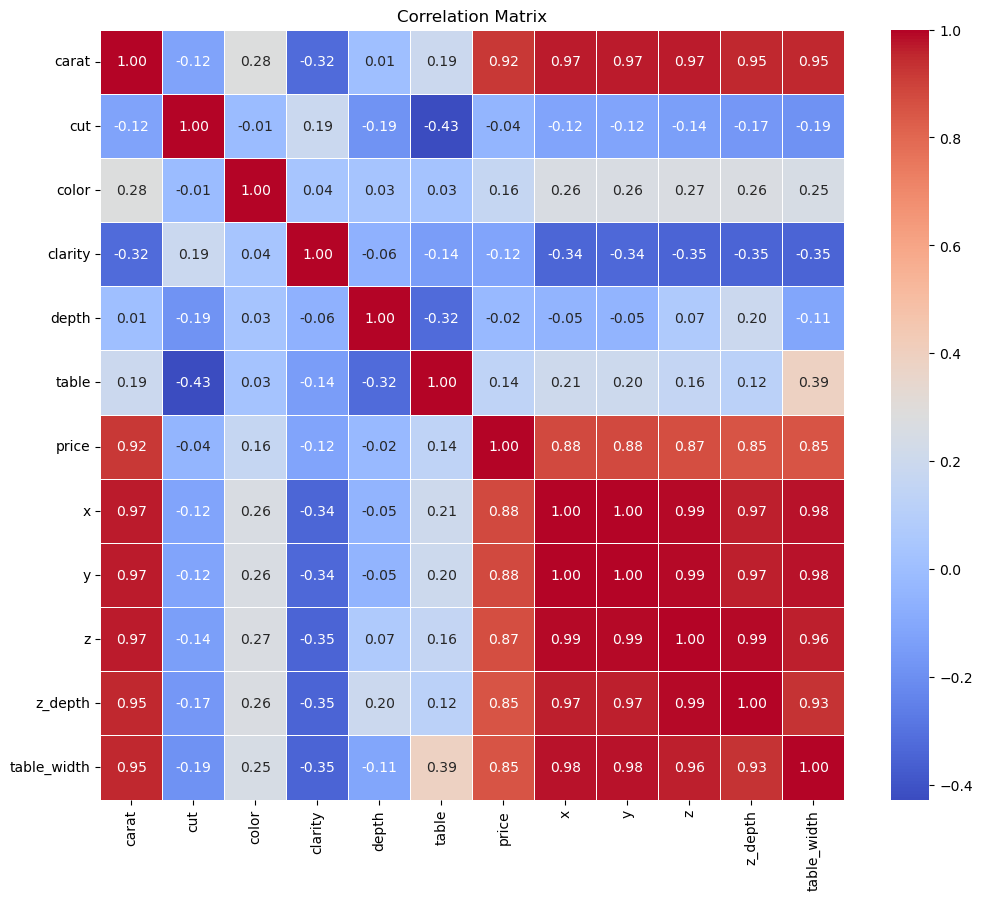

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


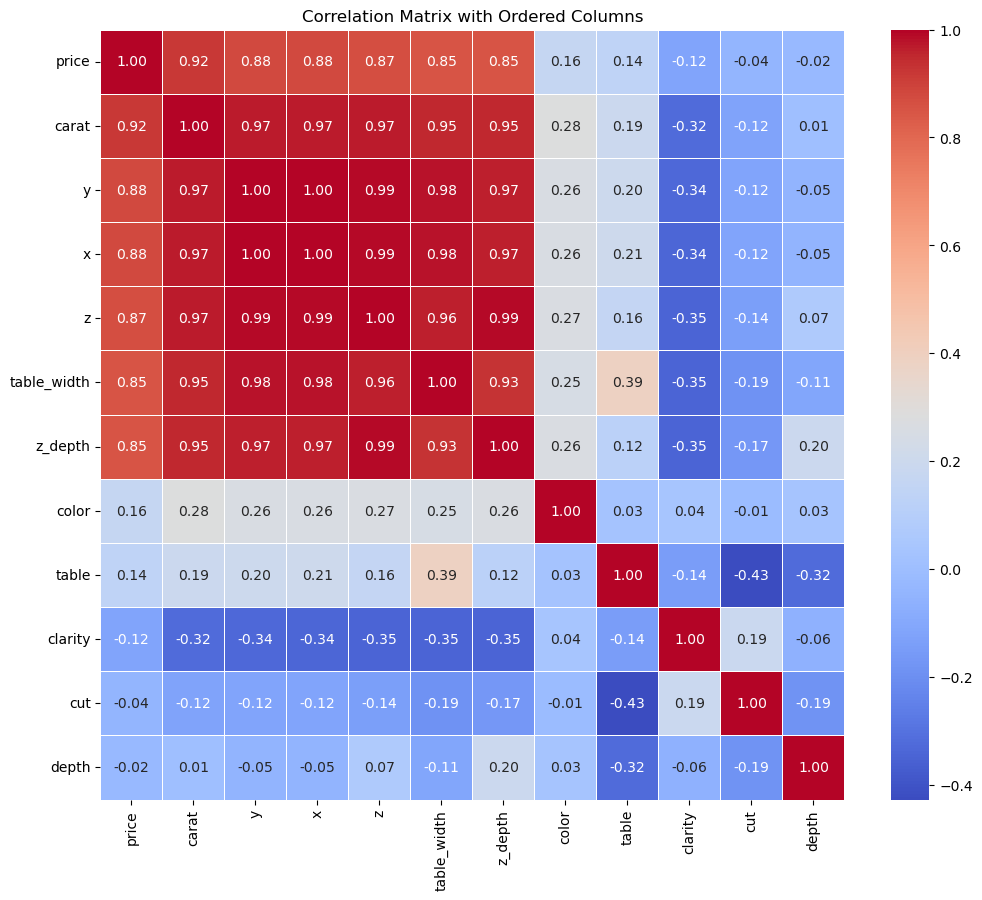

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the order of columns based on the correlation with a specific column (e.g., 'price')
ordered_columns = correlation_matrix['price'].abs().sort_values(ascending=False).index

# Reorder the DataFrame columns
df_ordered = df[ordered_columns]

# Create a heatmap to visualize the correlation matrix with ordered columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_ordered.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix with Ordered Columns")
plt.show()


In [26]:
import pandas as pd

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Drop the 'color_classification' column
df.drop('color_classification', axis=1, inplace=True)

# Save the updated DataFrame to a new TSV file without header
tsv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds_no_classification.tsv"
df.to_csv(tsv_path, sep='\t', index=False, header=False)

print(f"DataFrame without 'color_classification' saved to {tsv_path}")


DataFrame without 'color_classification' saved to C:\Users\cassiorodrigo.crisfa\Documents\GitHub\xtream-ai-assignment\Cristani\diamonds_no_classification.tsv


In [27]:
import pandas as pd

# Specify the path to the TSV file without header
tsv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds_no_classification.tsv"

# Read the TSV file into a DataFrame
df_no_classification = pd.read_csv(tsv_path, sep='\t', header=None)

# Display the head of the DataFrame
print("Head of DataFrame without 'color_classification':")
print(df_no_classification.head())


Head of DataFrame without 'color_classification':
     0   1   2   3     4     5     6     7     8     9        10       11
0  1.10   5   5   2  62.0  55.0  4733  6.61  6.65  4.11  25482.0  36355.0
1  1.29   5   5   3  62.6  56.0  6424  6.96  6.93  4.35  27231.0  38976.0
2  1.20   4   6   3  61.1  58.0  5510  6.88  6.80  4.18  25539.8  39904.0
3  1.50   5   3   3  60.9  56.0  8770  7.43  7.36  4.50  27405.0  41608.0
4  0.90   3   3   4  61.7  57.0  4493  6.17  6.21  3.82  23569.4  35169.0


In [29]:
import pandas as pd

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Divide the 'price' column into 5 categories with 'Category 1' as the highest prices
df['price_classification'] = pd.qcut(df['price'], q=5, labels=['Category 5', 'Category 4', 'Category 3', 'Category 2', 'Category 1'])

# Save the 'price_classification' column to a new TSV file without header
price_class_tsv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\price_classifications.tsv"
df['price_classification'].to_csv(price_class_tsv_path, sep='\t', header=False, index=False)

print(f"Price classifications saved to {price_class_tsv_path}")


Price classifications saved to C:\Users\cassiorodrigo.crisfa\Documents\GitHub\xtream-ai-assignment\Cristani\price_classifications.tsv


In [30]:
import pandas as pd

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Calculate the threshold for the top 1% and top 10% prices
top_1_threshold = df['price'].quantile(0.99)
top_10_threshold = df['price'].quantile(0.90)

# Classify the prices into categories
df['price_classification'] = 'Category 3'  # Default: Category 3 for the rest
df.loc[df['price'] > top_1_threshold, 'price_classification'] = 'Category 1'
df.loc[(df['price'] <= top_1_threshold) & (df['price'] > top_10_threshold), 'price_classification'] = 'Category 2'

# Save the 'price_classification' column to a new TSV file without header
price_deca_tsv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\price_deca.tsv"
df['price_classification'].to_csv(price_deca_tsv_path, sep='\t', header=False, index=False)

print(f"Price classifications for top 1%, top 10%, and the rest saved to {price_deca_tsv_path}")


Price classifications for top 1%, top 10%, and the rest saved to C:\Users\cassiorodrigo.crisfa\Documents\GitHub\xtream-ai-assignment\Cristani\price_deca.tsv


In [32]:
import pandas as pd
import plotly.express as px

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Calculate the threshold for the top 1% and top 10% prices
top_1_threshold = df['price'].quantile(0.99)
top_10_threshold = df['price'].quantile(0.90)

# Classify the prices into categories
df['price_classification'] = 'Category 3'  # Default: Category 3 for the rest
df.loc[df['price'] > top_1_threshold, 'price_classification'] = 'Category 1'
df.loc[(df['price'] <= top_1_threshold) & (df['price'] > top_10_threshold), 'price_classification'] = 'Category 2'

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='carat', y='depth', z='price', color='price_classification',
                    labels={'price_classification': 'Price Classification'},
                    title='3D Scatter Plot with Price Classification',
                    color_discrete_map={'Category 1': 'red', 'Category 2': 'green', 'Category 3': 'blue'})

# Show the plot
fig.show()


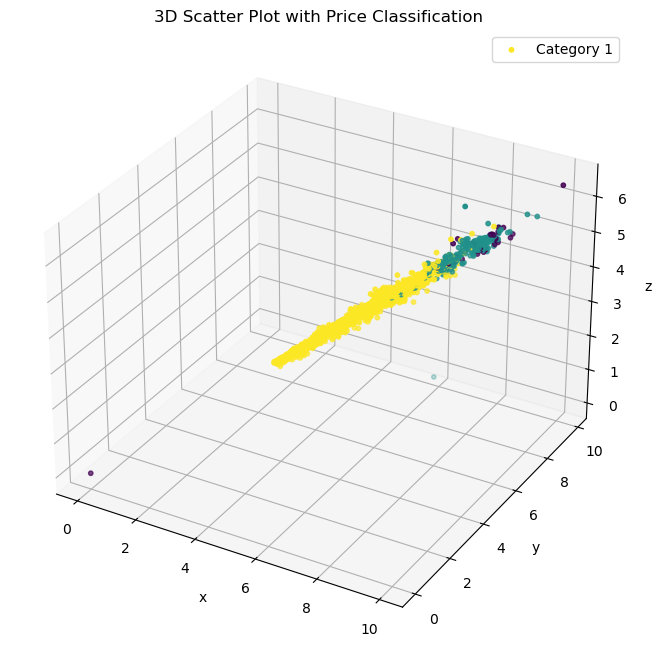

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to the CSV file
csv_path = "C:\\Users\\cassiorodrigo.crisfa\\Documents\\GitHub\\xtream-ai-assignment\\Cristani\\diamonds.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Calculate the threshold for the top 1% and top 10% prices
top_1_threshold = df['price'].quantile(0.99)
top_10_threshold = df['price'].quantile(0.90)

# Classify the prices into categories
df['price_classification'] = 'Category 3'  # Default: Category 3 for the rest
df.loc[df['price'] > top_1_threshold, 'price_classification'] = 'Category 1'
df.loc[(df['price'] <= top_1_threshold) & (df['price'] > top_10_threshold), 'price_classification'] = 'Category 2'


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with 'carat', 'depth', 'price', and color-coded by 'price_classification'
scatter = ax.scatter(df['x'], df['y'], df['z'], c=df['price_classification'].astype('category').cat.codes, cmap='viridis', s=10)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Scatter Plot with Price Classification')
legend_labels = [f'Category {i}' for i in range(1, 4)]
ax.legend(legend_labels)

# Show the plot
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'